<a href="https://colab.research.google.com/github/GabrielaRomoM/TAM-2025-2/blob/main/Tareas/TAM_IntroductionDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias y carga de datos

In [1]:
from IPython.display import clear_output
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import time

In [2]:
# Cargar Fashion Mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

clear_output()
print("Train:", X_train.shape); print("Valid:", X_valid.shape);print("Test:", X_test.shape)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Train: (55000, 28, 28)
Valid: (5000, 28, 28)
Test: (10000, 28, 28)


# Ejercicio

Configure el entorno de Colab para trabajar con GPU. Repita el entrenamiento del modelo de clasificación Fashion mnist para batch size en 32, 64, 128, 256, y 512. Reporte una tabla con los rendimientos sobre el conjunto de test y el tiempo promedio de cómputo por época. (Repita el procedimiento del punto anterior configurando Colab para trabajar con TPU.)

In [3]:
batch_sizes = [32, 64, 128, 256, 512]
results = []
histories = {}

for batch in batch_sizes:
  # Crear un nuevo modelo
  model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.Dense(300, activation="relu"),
      keras.layers.Dense(100, activation="relu"),
      keras.layers.Dense(10, activation="softmax")
  ])

  model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd", metrics=["accuracy"])

  # Tiempo de Ejecución
  start_t = time.time()
  history = model.fit(X_train, y_train, epochs=10, batch_size=batch,validation_data=(X_valid, y_valid), verbose=0)
  end_t = time.time()

  # Tiempo promedio (por epoca)
  avg_t = (end_t - start_t) / 10.0

  # Evaluación
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

  # Resultados
  results.append({"Batch Size": batch, "Test Accuracy": test_acc,
    "Test Loss": test_loss, "Avg Time per Epoch (s)": avg_t})
  histories[batch] = history.history
  clear_output(wait=True)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Tabla de Resultados
results_df = pd.DataFrame(results)
display(results_df)

,Batch Size,Test Accuracy,Test Loss,Avg Time per Epoch (s)
0,32,0.8661,0.379063,4.392445
1,64,0.8399,0.455326,2.392191
2,128,0.8379,0.463076,1.353705
3,256,0.8270,0.504573,0.978956
4,512,0.8060,0.568663,0.740247


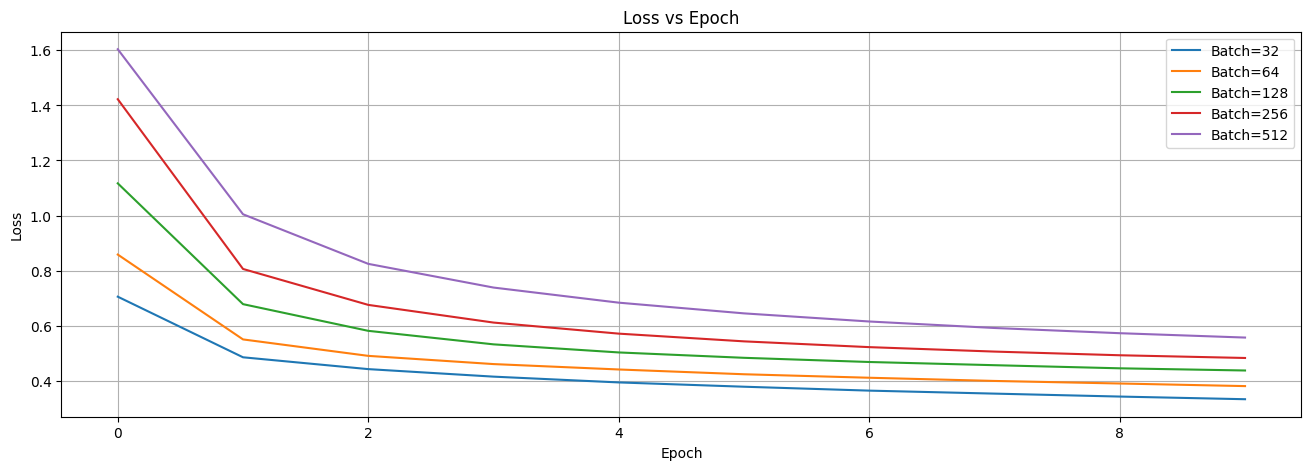

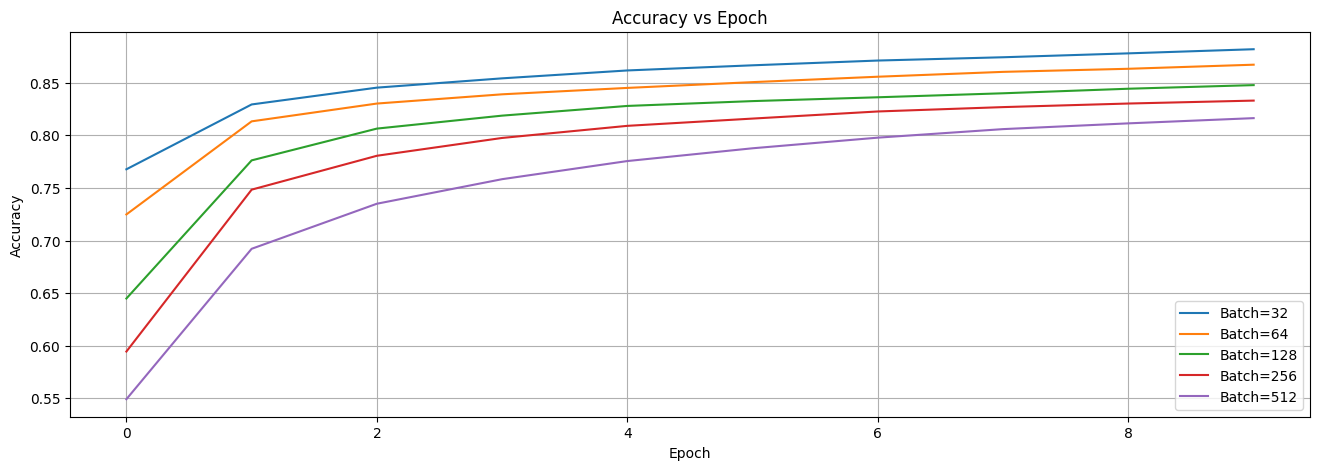

In [5]:
# Graficar de la pérdida durante entrenamiento
plt.figure(figsize=(16,5))
for batch, hist in histories.items():
  plt.plot(hist["loss"], label=f"Batch={batch}")
plt.title("Loss vs Epoch")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.grid(True); plt.show()
print("")
# Grafica evolución del accuracy durante entrenamiento
plt.figure(figsize=(16,5))
for batch, hist in histories.items():
  plt.plot(hist["accuracy"], label=f"Batch={batch}")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend(); plt.grid(True); plt.show()

## Con TPU

In [7]:
!pip install tensorflow tensorflow_gcs_config tensorflow_datasets -q
clear_output()

In [8]:
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [9]:
# Cargar Fashion Mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

clear_output()
print("Train:", X_train.shape); print("Valid:", X_valid.shape);print("Test:", X_test.shape)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Train: (55000, 28, 28)
Valid: (5000, 28, 28)
Test: (10000, 28, 28)


In [10]:
batch_sizes = [32, 64, 128, 256, 512]
results = []
histories = {}

for batch in batch_sizes:
  # Crear un nuevo modelo
  model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.Dense(300, activation="relu"),
      keras.layers.Dense(100, activation="relu"),
      keras.layers.Dense(10, activation="softmax")
  ])

  model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd", metrics=["accuracy"])

  # Tiempo de Ejecución
  start_t = time.time()
  history = model.fit(X_train, y_train, epochs=10, batch_size=batch,validation_data=(X_valid, y_valid), verbose=0)
  end_t = time.time()

  # Tiempo promedio (por epoca)
  avg_t = (end_t - start_t) / 10.0

  # Evaluación
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

  # Resultados
  results.append({"Batch Size": batch, "Test Accuracy": test_acc,
    "Test Loss": test_loss, "Avg Time per Epoch (s)": avg_t})
  histories[batch] = history.history
  clear_output(wait=True)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Tabla de Resultados
results_df = pd.DataFrame(results)
display(results_df)

,Batch Size,Test Accuracy,Test Loss,Avg Time per Epoch (s)
0,32,0.8591,0.391287,2.560792
1,64,0.8556,0.420454,1.498232
2,128,0.8374,0.458279,1.114400
3,256,0.8249,0.502741,0.853696
4,512,0.8089,0.570106,0.748077


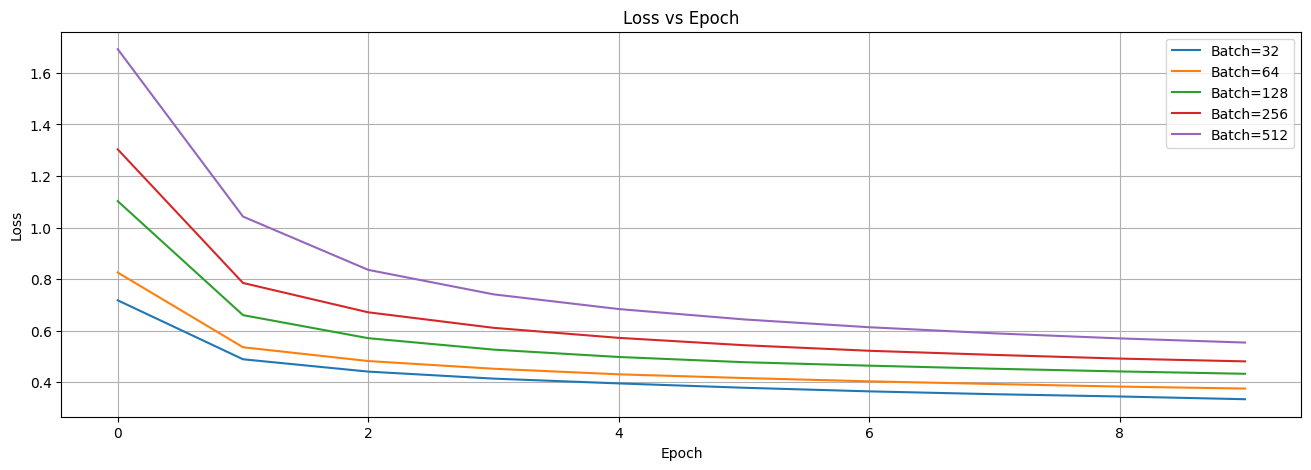

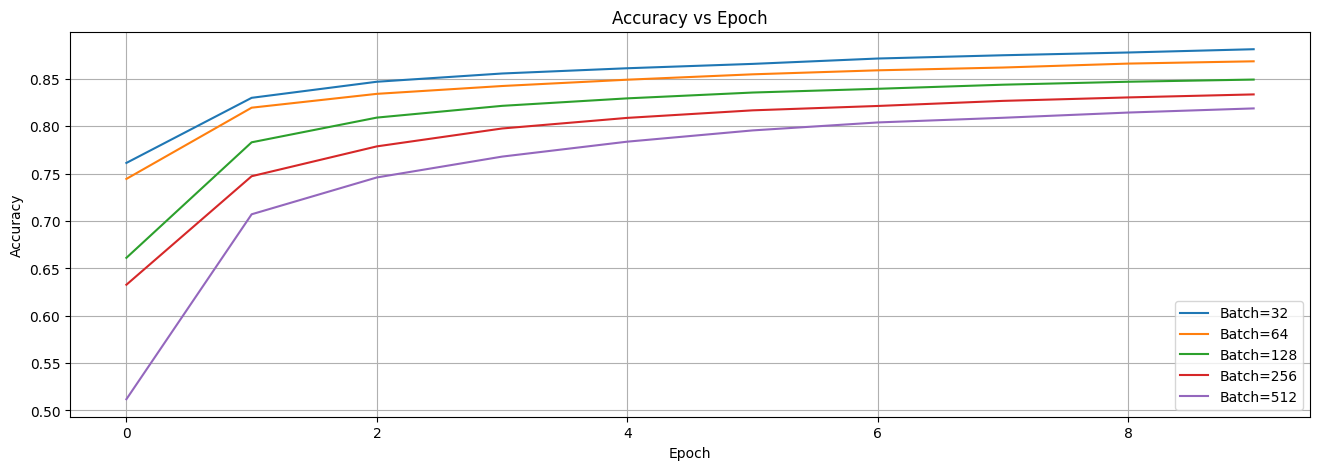

In [12]:
# Graficar de la pérdida durante entrenamiento
plt.figure(figsize=(16,5))
for batch, hist in histories.items():
  plt.plot(hist["loss"], label=f"Batch={batch}")
plt.title("Loss vs Epoch")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.grid(True); plt.show()
print("")
# Grafica evolución del accuracy durante entrenamiento
plt.figure(figsize=(16,5))
for batch, hist in histories.items():
  plt.plot(hist["accuracy"], label=f"Batch={batch}")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend(); plt.grid(True); plt.show()